<a href="https://colab.research.google.com/github/26Kenn07/Machine-Learning-Projects/blob/main/Car_Acceptability_Classification_Using_DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load Dataset

In [2]:
df = pd.read_csv('/content/car.csv')

In [3]:
df.head()

,Buying_Price,Maintenance_Price,No_of_Doors,Person_Capacity,Size_of_Luggage,Safety,Car_Acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
df.shape

(1728, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Buying_Price       1728 non-null   object
 1   Maintenance_Price  1728 non-null   object
 2   No_of_Doors        1728 non-null   object
 3   Person_Capacity    1728 non-null   object
 4   Size_of_Luggage    1728 non-null   object
 5   Safety             1728 non-null   object
 6   Car_Acceptability  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


Checking Unique values in categorical columns

In [6]:
df['Buying_Price'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [7]:
df['Maintenance_Price'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [8]:
df['Size_of_Luggage'].unique()

array(['small', 'med', 'big'], dtype=object)

In [9]:
df['Safety'].unique()

array(['low', 'med', 'high'], dtype=object)

In [10]:
df['Car_Acceptability'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

**Converting Categorical variables into numeric values**

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
LE = LabelEncoder()

In [13]:
df['Buying_Price'] = LE.fit_transform(df['Buying_Price'])

In [14]:
df['Maintenance_Price'] = LE.fit_transform(df['Maintenance_Price'])

In [15]:
df['Size_of_Luggage'] = LE.fit_transform(df['Size_of_Luggage'])

In [16]:
df['Safety'] = LE.fit_transform(df['Safety'])

In [17]:
df['Car_Acceptability'] = LE.fit_transform(df['Car_Acceptability'])

In [18]:
df.dtypes

Buying_Price          int64
Maintenance_Price     int64
No_of_Doors          object
Person_Capacity      object
Size_of_Luggage       int64
Safety                int64
Car_Acceptability     int64
dtype: object

In [19]:
df['No_of_Doors'] = LE.fit_transform(df['No_of_Doors'])

In [20]:
df['Person_Capacity'] = LE.fit_transform(df['Person_Capacity'])

In [21]:
df.head()

,Buying_Price,Maintenance_Price,No_of_Doors,Person_Capacity,Size_of_Luggage,Safety,Car_Acceptability
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [22]:
df['No_of_Doors'].astype(int)

0       0
1       0
2       0
3       0
4       0
       ..
1723    3
1724    3
1725    3
1726    3
1727    3
Name: No_of_Doors, Length: 1728, dtype: int64

**Data Visualization**

Bar Plot:

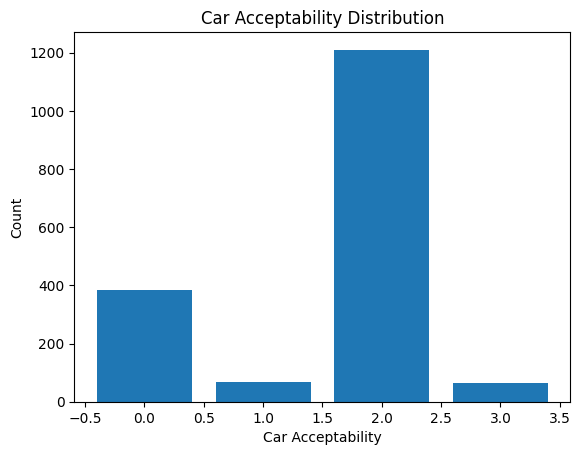

In [23]:
car_counts = df['Car_Acceptability'].value_counts()
plt.bar(car_counts.index, car_counts.values)
plt.title('Car Acceptability Distribution')
plt.xlabel('Car Acceptability')
plt.ylabel('Count')

plt.show()


Scatter Plot:

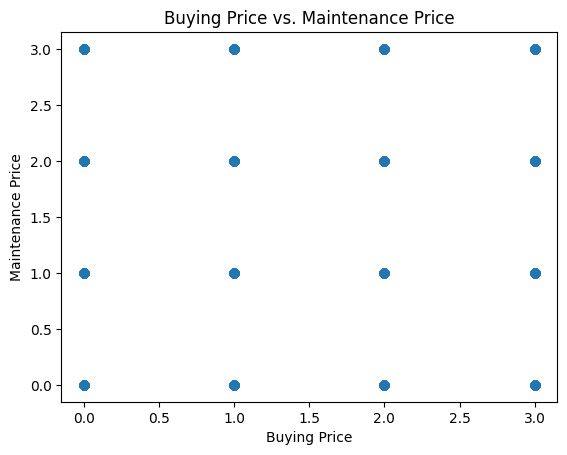

In [24]:
plt.scatter(df['Buying_Price'], df['Maintenance_Price'])
plt.title('Buying Price vs. Maintenance Price')
plt.xlabel('Buying Price')
plt.ylabel('Maintenance Price')

plt.show()


Histogram:

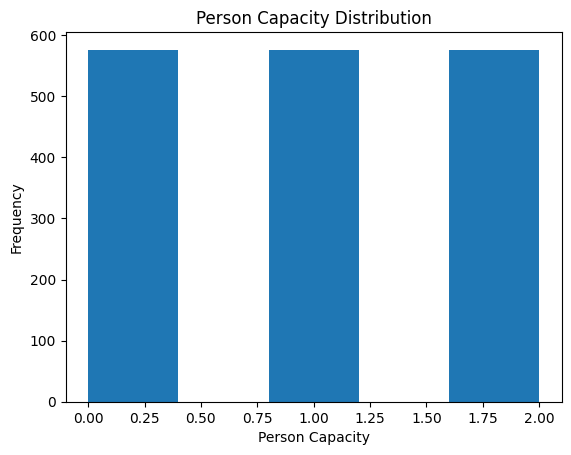

In [25]:
plt.hist(df['Person_Capacity'], bins=5)
plt.title('Person Capacity Distribution')
plt.xlabel('Person Capacity')
plt.ylabel('Frequency')

plt.show()


**Train & Test Split**

In [26]:
X = df.iloc[:,:-1]
X

,Buying_Price,Maintenance_Price,No_of_Doors,Person_Capacity,Size_of_Luggage,Safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2
...,...,...,...,...,...,...
1723,1,1,3,2,1,2
1724,1,1,3,2,1,0
1725,1,1,3,2,0,1
1726,1,1,3,2,0,2


In [27]:
y = df.iloc[:,-1:]
y

,Car_Acceptability
0,2
1,2
2,2
3,2
4,2
...,...
1723,1
1724,3
1725,2
1726,1


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

**DecisionTreeClassifier**

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
DT = DecisionTreeClassifier()

In [32]:
from sklearn.model_selection import cross_val_score
from hyperopt import hp,tpe,fmin,STATUS_OK,Trials

In [33]:
Space = {
    'criterion' : hp.choice('criterion',["gini", "entropy", "log_loss"]),
    'splitter' : hp.choice('splitter',["best", "random"]),
    'max_depth' : hp.quniform('max_depth',1,10,1)
}

In [34]:
def Bayesian(Space):
  DT = DecisionTreeClassifier(
      criterion = Space['criterion'],
      splitter = Space['splitter'],
      max_depth = int(Space['max_depth'])
  )
  accuracy = cross_val_score(DT,X_train,y_train,cv=5).mean()
  return{'loss' : -accuracy , 'status' : STATUS_OK}

In [35]:
trials = Trials()

In [36]:
Best = fmin(fn=Bayesian,space=Space,algo=tpe.suggest,max_evals=200,trials=trials)

100%|██████████| 200/200 [00:11<00:00, 17.01trial/s, best loss: -0.9732354941662742]


In [37]:
Best

{'criterion': 2, 'max_depth': 10.0, 'splitter': 0}

In [38]:
DT = DecisionTreeClassifier(criterion = 'log_loss',
                            max_depth = 10,)

In [39]:
DT.fit(X_train,y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=10)

Making Prediction using our model

In [40]:
y_hat = DT.predict(X_test)

**Model Evaluation**

In [41]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [42]:
print(accuracy_score(y_test,y_hat))

0.953757225433526


In [43]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91        83
           1       0.48      1.00      0.65        11
           2       0.99      1.00      0.99       235
           3       1.00      0.82      0.90        17

    accuracy                           0.95       346
   macro avg       0.86      0.92      0.86       346
weighted avg       0.97      0.95      0.96       346



In [44]:
print(confusion_matrix(y_test,y_hat))

[[ 70  10   3   0]
 [  0  11   0   0]
 [  0   0 235   0]
 [  1   2   0  14]]


**Plotting DecisionTree**

In [45]:
from sklearn import tree

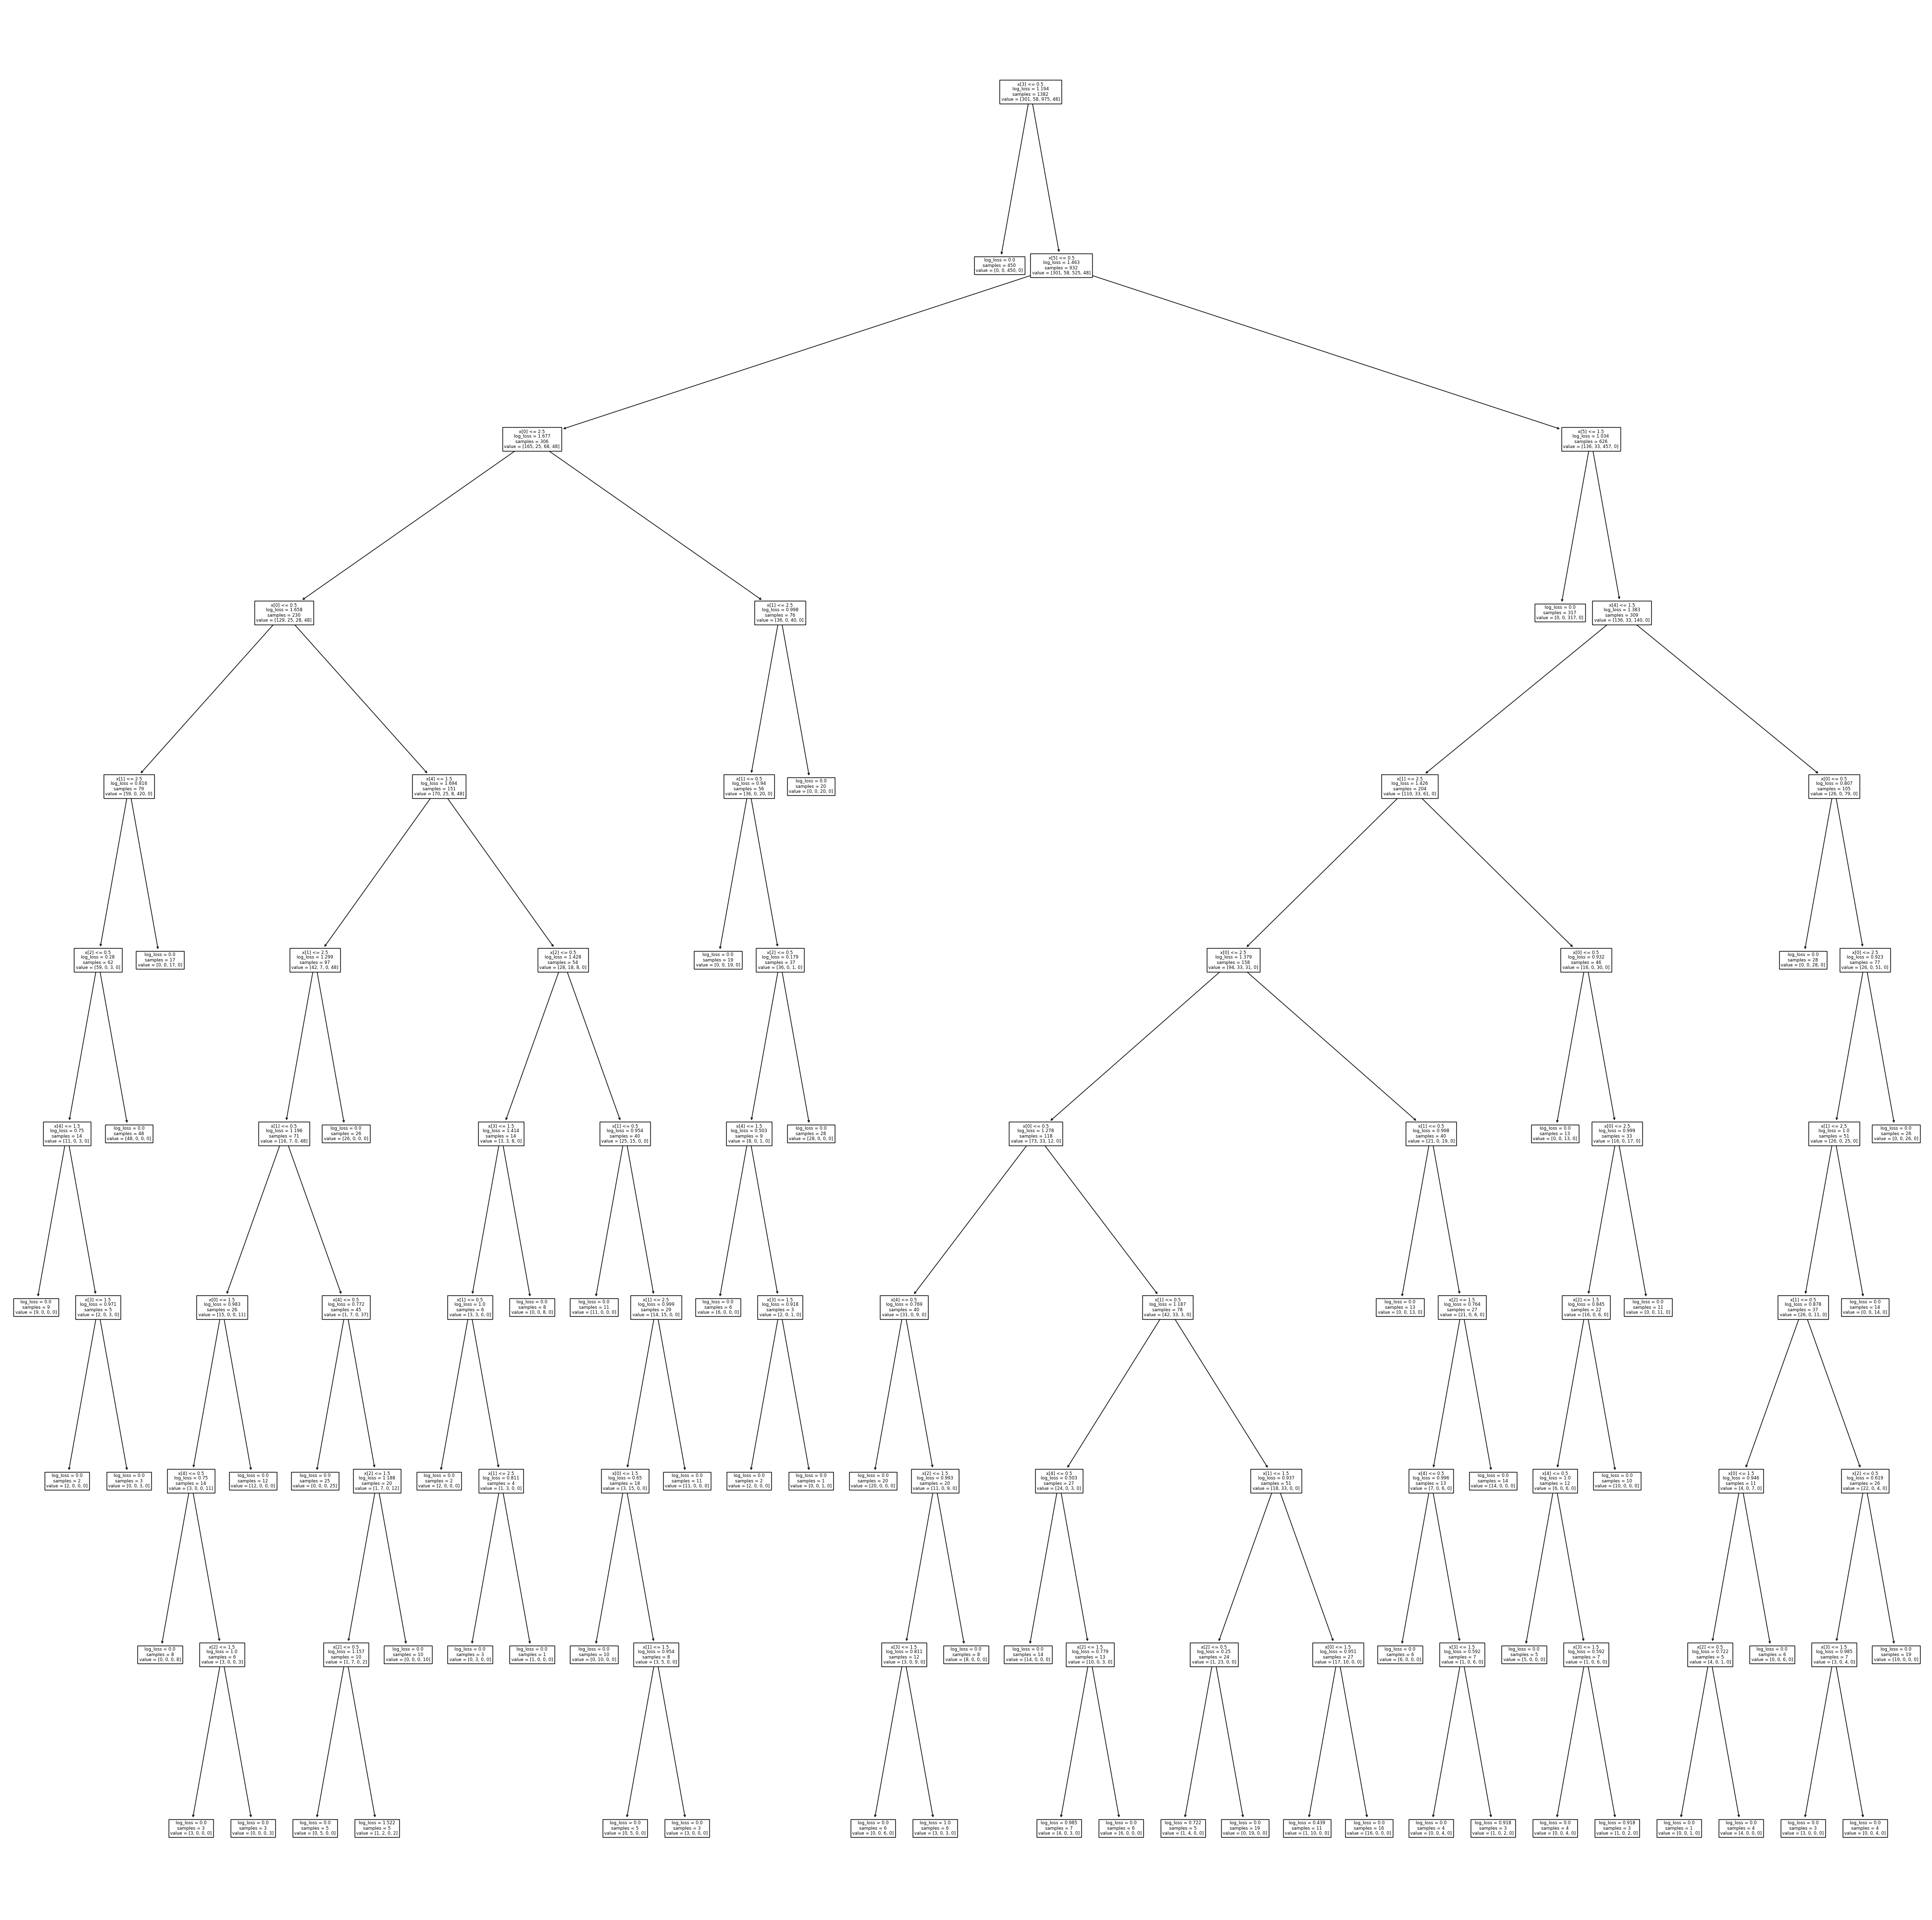

In [46]:
fig, ax = plt.subplots(figsize=(50, 50))
tree.plot_tree(DT, ax=ax)
plt.show()